/home/jinlng/test_dir/test_env/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


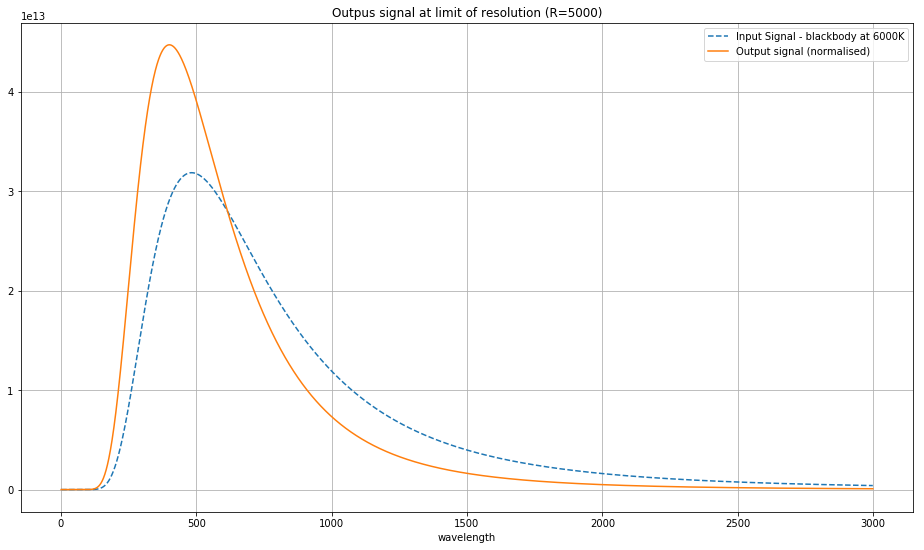

In [15]:
import numpy as np
from scipy import signal
from astropy.io import fits
from itertools import product
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import minimize

# Gaussian
def fct_Gauss(x,esp,sig):
    return (1/(np.sqrt(2*np.pi)*sig))*np.exp(-0.5*(x-esp)**2/sig**2)

# Basic black-body spectrum plot
h = 6.62606885e-34 # Planck constant
c = 2.99792458e+8  # speed of light
k = 1.38064852e-23 # Boltzmann constant

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
T = 6000. # bb temperature
wavelength = np.arange(1e-9, 3e-6, 1e-9) 
intensity = planck(wavelength, T)

# input signal
f = intensity
n = np.size (f)
# find the sigma of input signal

# try first with R=cste
R = 5000

######################################
dLam = wavelength/R   # dλ define the h(x) 
sig_g = dLam / np.sqrt(8*np.log(2))
cste = np.sqrt(-np.log(0.37703)*8)     # calcul done by hand, d~cste*λ/R
######################################

# convolve with a Gaussian defined by resolution
g = np.zeros(n)
for i in range(n):
    g += f[i] * fct_Gauss(wavelength,wavelength[i],sig_g[i])
# Normalise the output flux to the input one 
g = g * np.trapz(f,wavelength) / np.trapz(g,wavelength)

plt.figure(figsize=[16,9])
plt.title("Outpus signal at limit of resolution (R=5000)")
plt.xlabel('wavelength')
plt.plot(wavelength*1e9, f, '--', label="Input Signal - blackbody at 6000K")
plt.plot(wavelength*1e9, g, label='Output signal (normalised)')
plt.legend()
plt.grid(True)
plt.show()